<a href="https://colab.research.google.com/github/Sashka123123/CHM/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Відрізок 1:
S_0(x) = 2.75 + 7.3011(x - 0.7) + 0.0(x - 0.7)^2 + -28.1318(x - 0.7)^3, x належить [0.7, 1.1]
Відрізок 2:
S_1(x) = 3.87 + -6.2022(x - 1.1) + -33.7582(x - 1.1)^2 + 84.4035(x - 1.1)^3, x належить [1.1, 1.4]
Відрізок 3:
S_2(x) = 1.25 + -3.6682(x - 1.4) + 42.205(x - 1.4)^2 + -45.6573(x - 1.4)^3, x належить [1.4, 1.9]
Відрізок 4:
S_3(x) = 4.26 + 9.6502(x - 1.9) + -26.281(x - 1.9)^2 + -12.5147(x - 1.9)^3, x належить [1.9, 2.6]
Значення сплайна:
x = 0.70, y = 2.750
x = 0.72, y = 3.159
x = 0.74, y = 3.520
x = 0.76, y = 3.834
x = 0.78, y = 4.104
x = 0.80, y = 4.331
x = 0.82, y = 4.518
x = 0.83, y = 4.667
x = 0.85, y = 4.779
x = 0.87, y = 4.857
x = 0.89, y = 4.903
x = 0.91, y = 4.918
x = 0.93, y = 4.905
x = 0.95, y = 4.866
x = 0.97, y = 4.802
x = 0.99, y = 4.716
x = 1.01, y = 4.609
x = 1.03, y = 4.484
x = 1.05, y = 4.343
x = 1.06, y = 4.187
x = 1.08, y = 4.020
x = 1.10, y = 3.841
x = 1.12, y = 3.655
x = 1.14, y = 3.462
x = 1.16, y = 3.264
x = 1.18, y = 3.065
x = 1.20, y = 2.865
x = 1

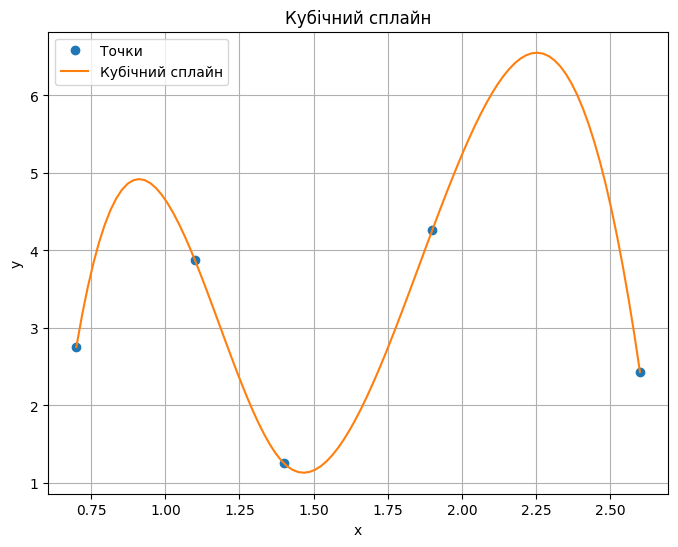

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.7, 1.1, 1.4, 1.9, 2.6])
y = np.array([2.75, 3.87, 1.25, 4.26, 2.43])
n = len(x) - 1
h = np.diff(x)
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
  alpha[i] = (3 / h[i]) * (y[i+1] - y[i]) - (3 / h[i-1]) * (y[i] - y[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
  l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
  mu[i] = h[i] / l[i]
  z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (y[n] - y[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
  c[j] = z[j] - mu[j] * c[j+1]
  b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
  d[j] = (c[j+1] - c[j]) / (3 * h[j])
# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
  print(f"Відрізок {i+1}:")
  print(f"S_{i}(x) = {y[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Показ значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
  print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()